# Part one of three for the Machine Learning series by Stanford University and DeepLearning.AI
1. **Supervised Machine Learning: Regression and Classification**
2. Advanced Learning Algorithms
3. Unsupervised Learning, Recommenders, Reinforcement Learning

# Linear Regression (Simple demo)
this demonstrates the idea of linear regression, where the model predicts the housing price based on it's sqft.

In [3]:
import urllib.request

base_url = 'https://raw.githubusercontent.com/bryancheng14/Supervised-Machine-Learning-Regression-and-Classification/refs/heads/cost-function/'

files = ['deeplearning.mplstyle', 'lab_utils_uni.py', 'lab_utils_common.py']

for f in files:
    urllib.request.urlretrieve(base_url + f, f)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
plt.style.use('deeplearning.mplstyle')

## Problem Statement

prediction of housing price with 2 data points of housing data
| Size (1000 sqft)| Price ($m) |
|-----------------|------------|
| 1.0             | 300        |
| 2.0             | 500        |

In [5]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f'x_train = {x_train}')
print(f'y_train = {y_train}')

x_train = [1. 2.]
y_train = [300. 500.]


## Number of training examples `m`

In [6]:
print(f'x_train.shape: {x_train.shape}')
m = x_train.shape[0]
print(f'Number of training examples is: {m}')

x_train.shape: (2,)
Number of training examples is: 2


In [7]:
m = len(x_train)
print(f'Number of training examples is: {m}')

Number of training examples is: 2


## Training example pairs $x^{i}$ and $y^{i}$

In [8]:
i = 0
x_i = x_train[i]
y_i = y_train[i]
print(f'(x^({i}), y^({i})) = ({x_i}, {y_i})')

(x^(0), y^(0)) = (1.0, 300.0)


## Plotting datapoints

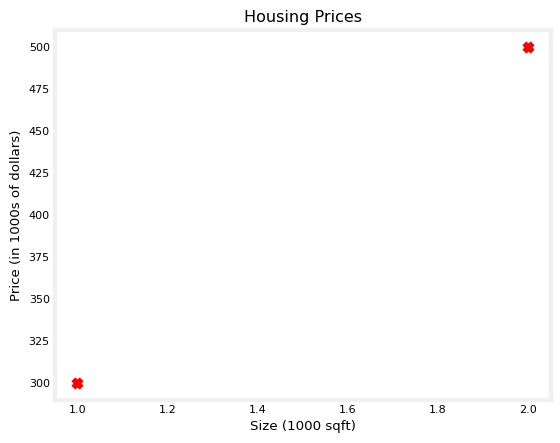

In [9]:
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title('Housing Prices')
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')
plt.show()

## Linear Regression Model
denoted as $f_{w,b}(x^i)=w \times x^i+b$

let $w = 100$ and $b = 100$

In [10]:
w = 100
b = 100
print(f'w: {w}')
print(f'b: {b}')

w: 100
b: 100


In [11]:
def compute_model_output(x, w, b):
  """
  Computes the prediction of a linear model
  Args:
    x (ndarray (m,)): Data, m examples
    w,b (scalar)    : model parameters
  Returns
    f_wb (ndarray (m,)): model prediction
  """
  m = x.shape[0]
  f_wb = np.zeros(m)
  for i in range(m):
      f_wb[i] = w * x[i] + b

  return f_wb

In [12]:
tmp_f_wb = compute_model_output(x_train, w, b)
print(f'our predicted prices: {tmp_f_wb}')

our predicted prices: [200. 300.]


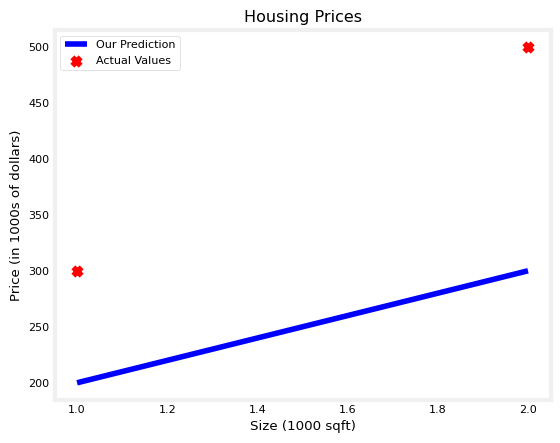

In [13]:
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')
plt.title('Housing Prices')
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

let $w = 200$ and $b = 100$

In [14]:
w = 200
b = 100
tmp_f_wb = compute_model_output(x_train, w, b)
print(f'our new predicted prices: {tmp_f_wb}')

our new predicted prices: [300. 500.]


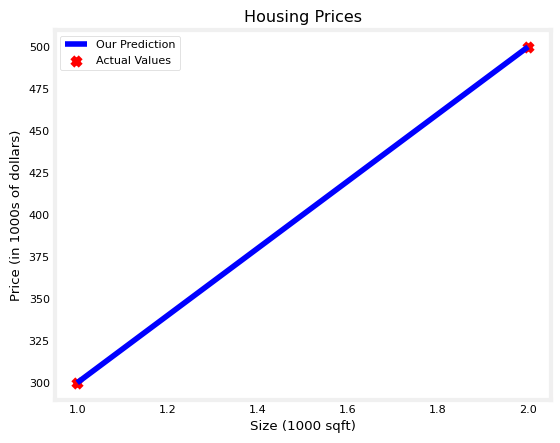

In [15]:
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')
plt.title('Housing Prices')
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

This is a good model and we can use it to predict other houses based on the sqft

## Predicting on new datapoint
if the house has a sqft of 1200, how much would it cost?

In [16]:
x_i = 1.2
cost = w * x_i + b
print(f'a house with {x_i*100:.0f} sqft would cost ${cost*1000:.0f} dollars!')

a house with 120 sqft would cost $340000 dollars!


# Cost Function

## Cost
cost is the measure of how well the model predicts the price of the house.

the lower the cost, the better the model is at predicting.

the cost function here is a modified Mean Squared Error (MSE).

the cost is defined by $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{i}) - y^{i})^2 $$

where
$$f_{w,b}(x^{i}) = wx^{i} + b$$
  
- $f_{w,b}(x^{i})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{i}) -y^{i})^2$ is the squared difference between the target value and the prediction.
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.

math notation is from $1$ to $m$, in code it is $0$ to $m-1$

In [17]:
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression.

    Args:
      x (ndarray (m,)): Data, m examples
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters

    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0]

    cost_sum = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum = cost_sum + cost
    total_cost = (1 / (2 * m)) * cost_sum

    return total_cost

# Understanding the relationship between weight ($w$), prediction (left) and cost (right)

In [18]:
plt_intuition(x_train, y_train)

interactive(children=(IntSlider(value=150, description='w', max=400, step=10), Output()), _dom_classes=('widge…